# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [0]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
pd.set_option('display.max_rows',100)
data.head().T

In [0]:
data.dtypes

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


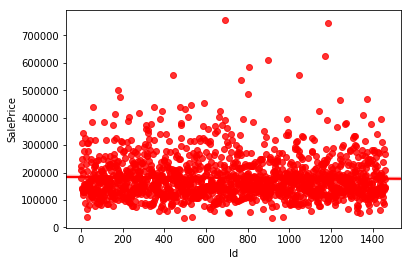

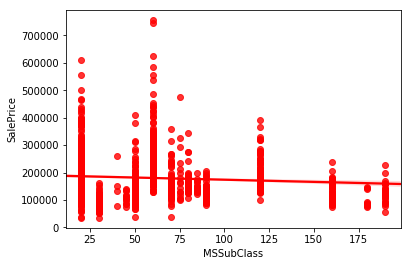

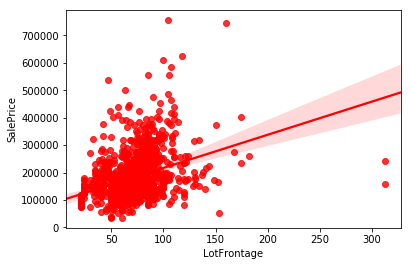

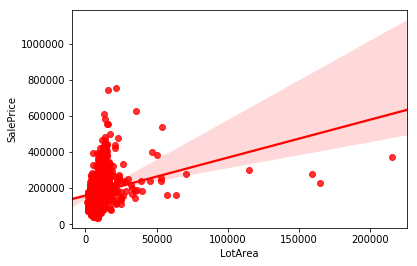

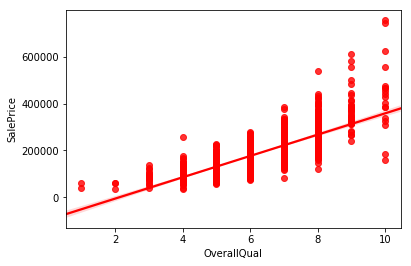

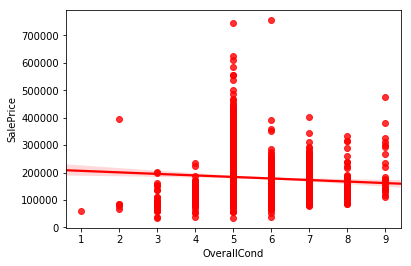

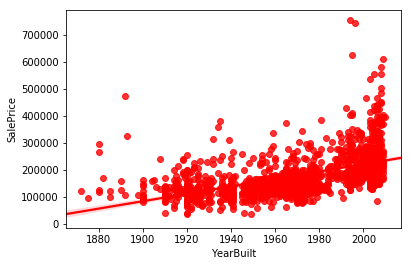

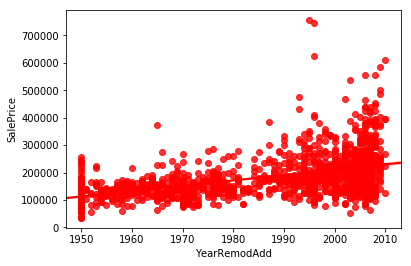

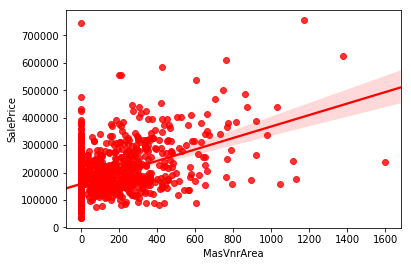

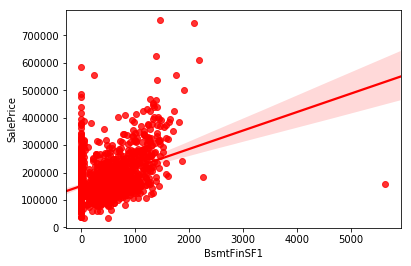

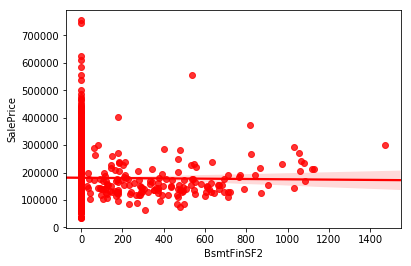

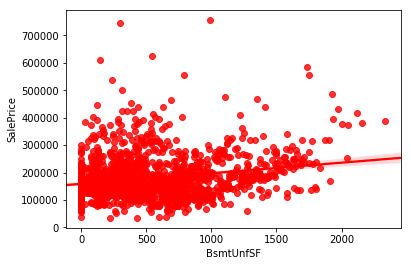

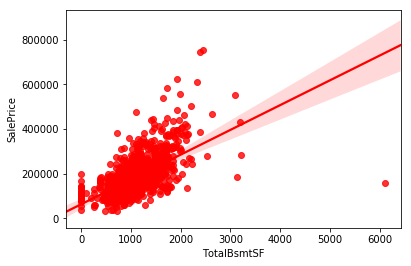

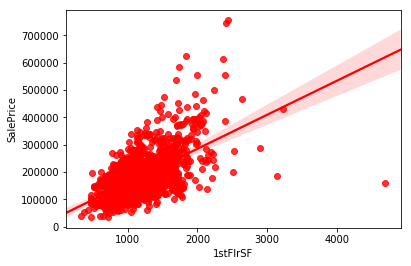

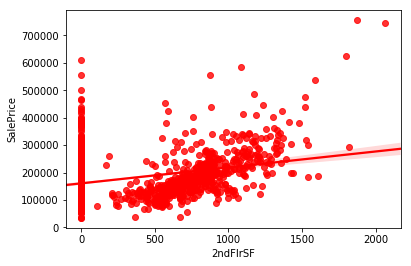

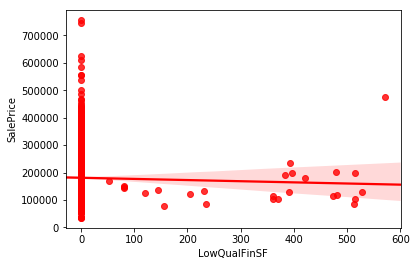

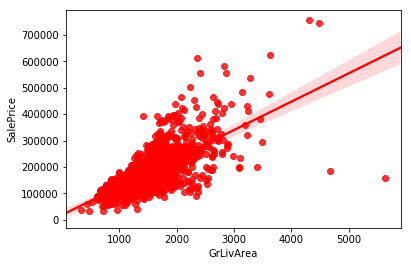

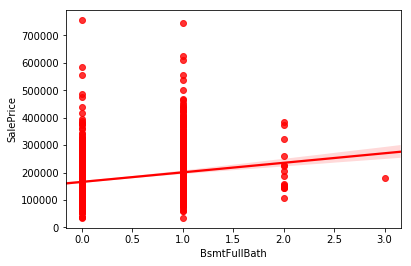

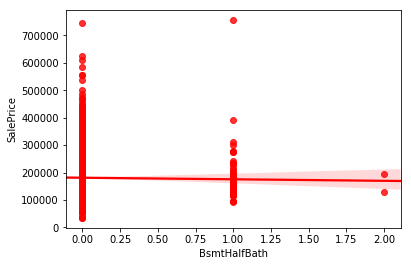

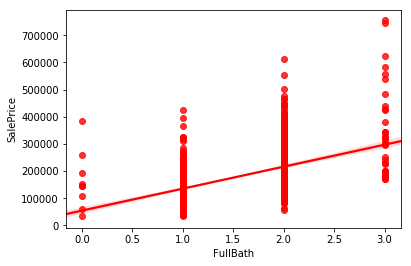

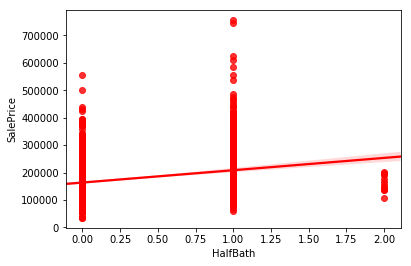

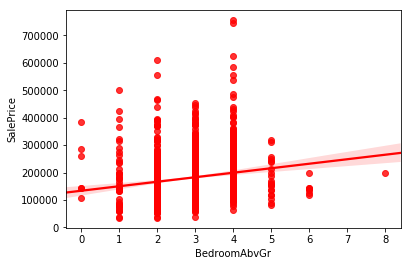

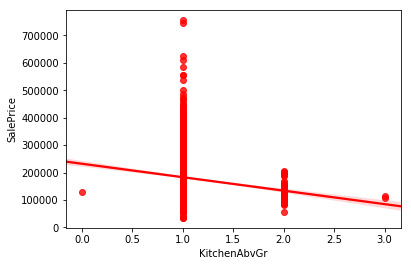

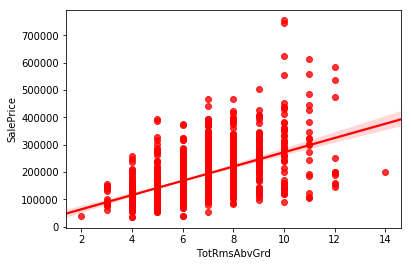

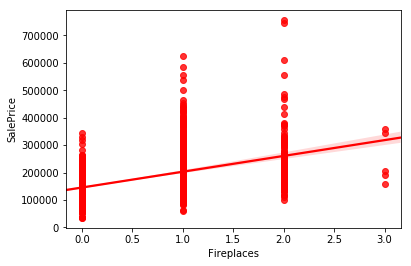

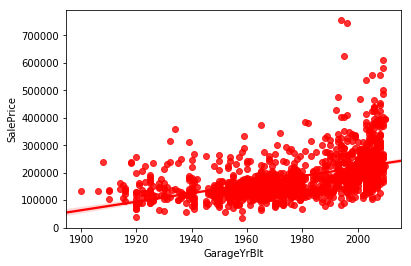

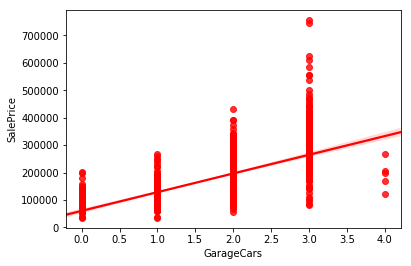

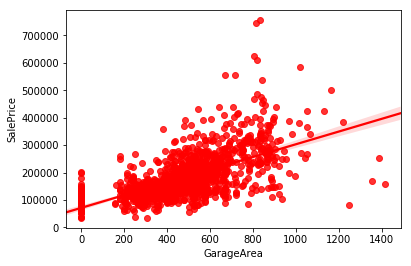

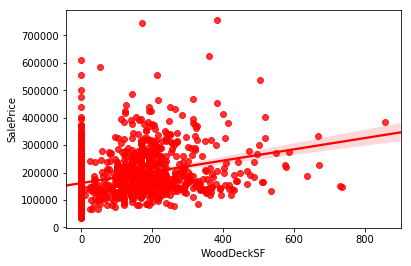

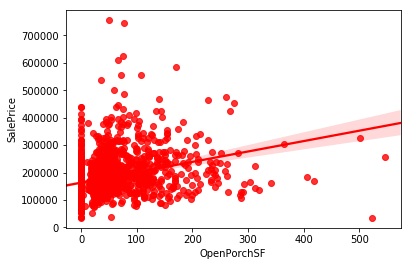

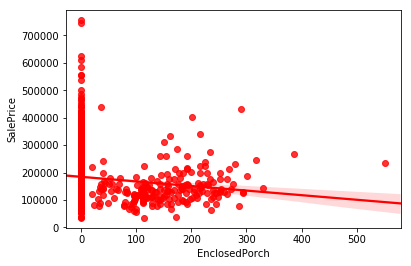

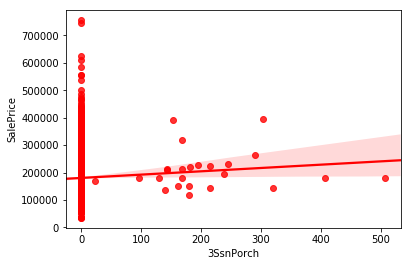

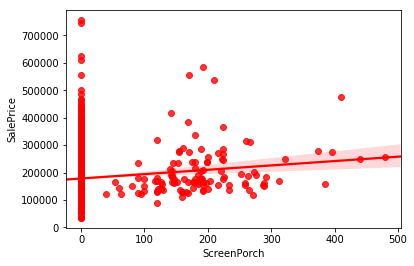

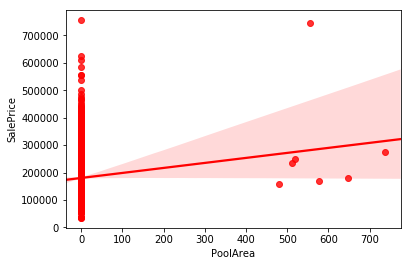

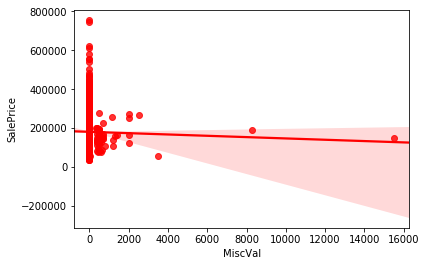

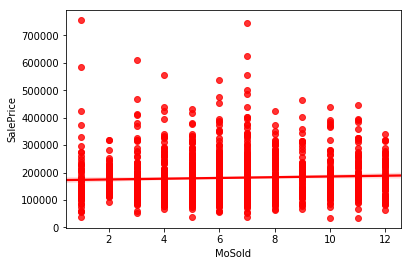

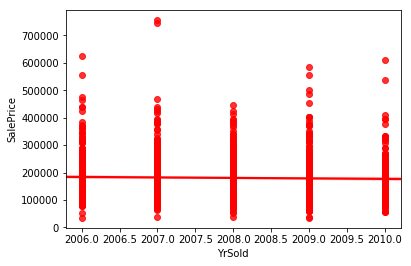

In [98]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
datas=data.drop('SalePrice',axis='columns').drop(data.select_dtypes(['object']),axis=1)
datas.head()
for i, col in enumerate(datas.columns):
  plt.figure(i)
  sns.regplot(col,data['SalePrice'].replace({0:np.nan}) , data = datas,color= 'red')

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [0]:
target = 'SalePrice'
features = ['OverallQual','YearBuilt','1stFlrSF','GrLivArea']
datas = data[['OverallQual','YearBuilt','1stFlrSF','GrLivArea','SalePrice']]

X = datas[features]
y = datas[target]


In [102]:
X.head()

,OverallQual,YearBuilt,1stFlrSF,GrLivArea
0,7,2003,856,1710
1,6,1976,1262,1262
2,7,2001,920,1786
3,7,1915,961,1717
4,8,2000,1145,2198


In [103]:
X.isna().any()

OverallQual    False
YearBuilt      False
1stFlrSF       False
GrLivArea      False
dtype: bool

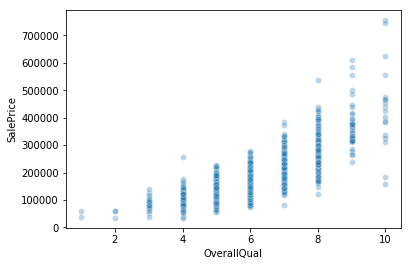

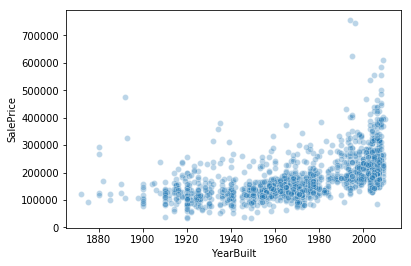

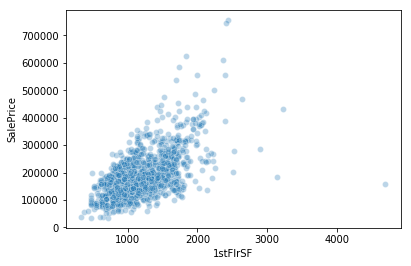

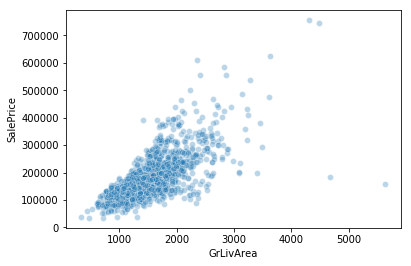

In [104]:
for feature in features:
  sns.scatterplot(x=feature,y=target,data=datas,alpha=.3)
  plt.show()

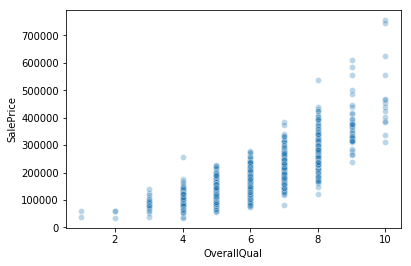

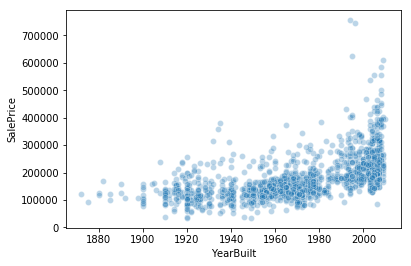

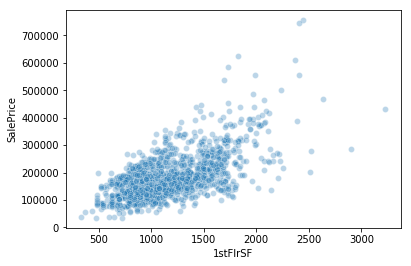

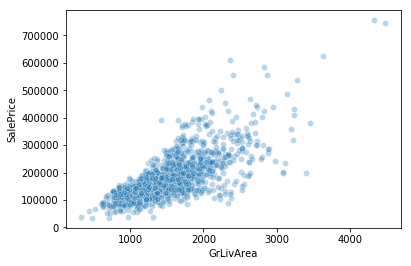

In [105]:
datas = datas.drop(datas[(datas['GrLivArea']>4000) & (datas['SalePrice']<300000)].index)
datas = datas.drop(datas[(datas['1stFlrSF']>3000) & (datas['SalePrice']<200000)].index)
datas = datas.drop(datas[(datas['YearBuilt']<1900) & (datas['SalePrice']>200000)].index)
datas = datas.drop(datas[(datas['OverallQual']>9) & (datas['SalePrice']<200000)].index)

for feature in features:
  sns.scatterplot(x=feature,y=target,data=datas,alpha=.3)
  plt.show()

In [0]:
print(X.info())
y

In [107]:
#OverallQual,YearBuilt,1stFlrSF,GrLivArea
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1130.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:18:34   Log-Likelihood:                -17513.
No. Observations:                1460   AIC:                         3.504e+04
Df Residuals:                    1455   BIC:                         3.506e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.683e+05   8.11e+04    -11.946      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

The P-values are all zero so I can reject the null hyp. The stadard error of overall quality is very high at around 1000.

In [0]:
##### Your Code Here #####

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

I removed some outliers maually earlier but let's see whether this does something as well.

In [108]:
from scipy import stats
print(datas.shape)
datas = datas[(np.abs(stats.zscore(datas)) < 3).all(axis=1)]
print(datas.shape)

(1454, 5)
(1415, 5)


In [109]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1130.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:18:59   Log-Likelihood:                -17513.
No. Observations:                1460   AIC:                         3.504e+04
Df Residuals:                    1455   BIC:                         3.506e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.683e+05   8.11e+04    -11.946      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Not any change from what I see. It's easier than manual though.

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

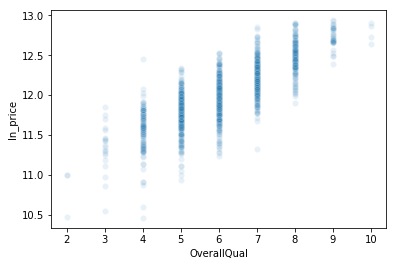

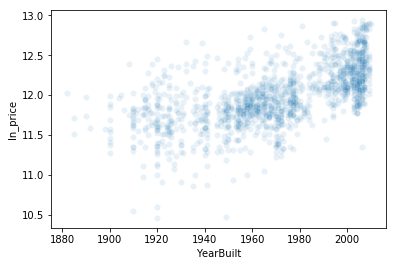

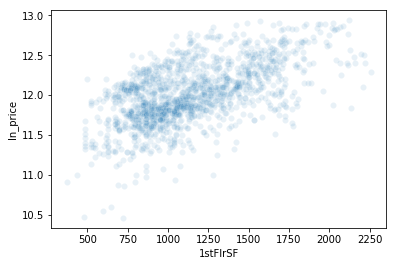

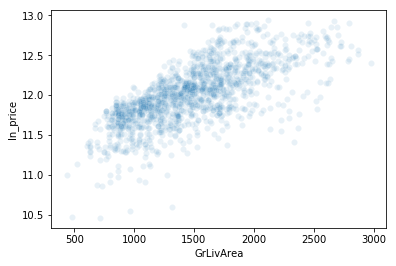

In [110]:
datas['ln_price'] = np.log(datas['SalePrice'])
datas = datas.drop(columns='SalePrice')

target = 'ln_price'
features = datas.columns.drop(target)
for feature in features:
    sns.scatterplot(x=feature, y=target, data=datas, alpha=0.1)
    plt.show()

In [111]:
X = datas[features] 
y = datas[target]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1491.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:22:25   Log-Likelihood:                 561.77
No. Observations:                1415   AIC:                            -1114.
Df Residuals:                    1410   BIC:                            -1087.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.3545      0.356     12.225      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


WOW, the standard error is like gone!

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
vif =[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
pd.Series(vif,X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          6759.395745
OverallQual       2.232884
YearBuilt         1.631116
1stFlrSF          1.357396
GrLivArea         1.651376
dtype: float64

No values greater than 10!

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [0]:
##### Your Code Here #####

## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
##### Your Code Here #####

Don't need to because my vif's are low.

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [127]:
model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 01 May 2019   Prob (F-statistic):                nan
Time:                        22:41:33   Log-Likelihood:                 34584.
No. Observations:                1415   AIC:                        -6.915e+04
Df Residuals:                    1405   BIC:                        -6.910e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
OverallQual          6.816e-15   9

The standard error actually went up.

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

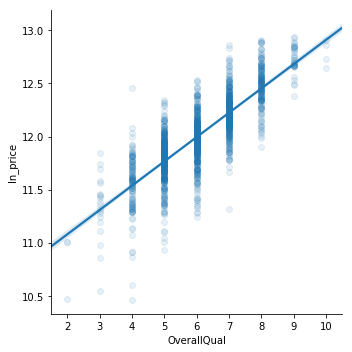

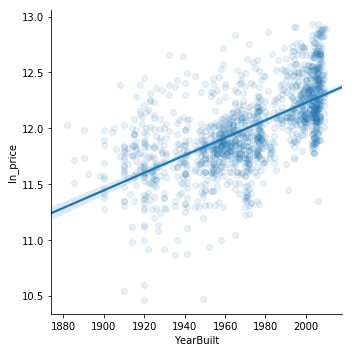

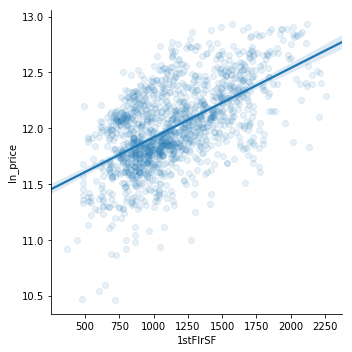

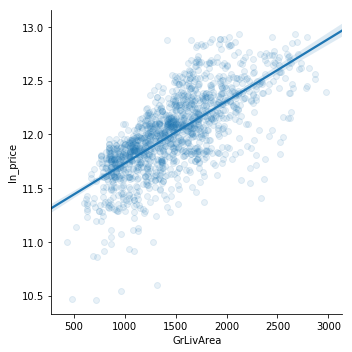

In [114]:
target = 'ln_price'
features = datas.columns.drop(target)
for feature in features:
    sns.lmplot(x=feature, y=target, data=datas, scatter_kws=dict(alpha=0.1))
    plt.show()

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

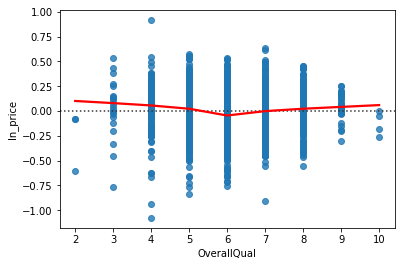

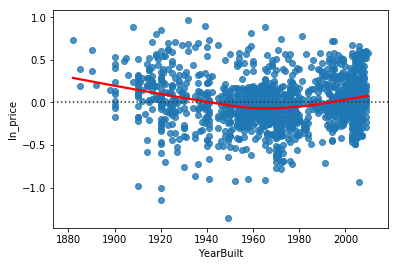

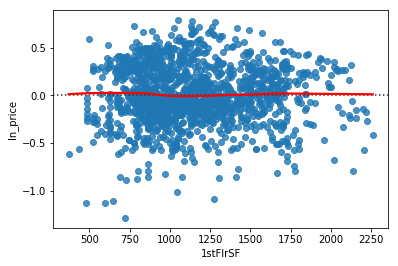

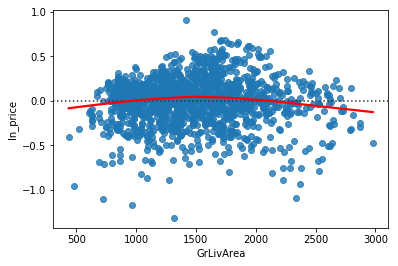

In [115]:
for feature in features:
  sns.residplot(X[feature], y, lowess=True, line_kws=dict(color='r'))
  plt.show()

In [0]:
datas['OverallQual_squared'] = datas['OverallQual']**2
datas['YearBuilt_sqrt'] = np.sqrt(datas['YearBuilt'])
datas['1stFlrSF_squared'] = datas['1stFlrSF']**2
datas['GrLivArea_squared'] = datas['GrLivArea']**2

In [124]:
features=datas.columns.drop(target)
datas

,OverallQual,YearBuilt,1stFlrSF,GrLivArea,ln_price,OverallQual_squared,YearBuilt_squared,1stFlrSF_squared,GrLivArea_squared,YearBuilt_sqrt
0,7,2003,856,1710,12.247694,49,4012009,732736,2924100,44.754888
1,6,1976,1262,1262,12.109011,36,3904576,1592644,1592644,44.452222
2,7,2001,920,1786,12.317167,49,4004001,846400,3189796,44.732538
3,7,1915,961,1717,11.849398,49,3667225,923521,2948089,43.760713
4,8,2000,1145,2198,12.429216,64,4000000,1311025,4831204,44.721360
5,5,1993,796,1362,11.870600,25,3972049,633616,1855044,44.643029
6,8,2004,1694,1694,12.634603,64,4016016,2869636,2869636,44.766059
7,7,1973,1107,2090,12.206073,49,3892729,1225449,4368100,44.418465
8,7,1931,1022,1774,11.774520,49,3728761,1044484,3147076,43.943145
9,5,1939,1077,1077,11.678440,25,3759721,1159929,1159929,44.034078


## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [133]:
X=datas.drop(columns = ['ln_price','YearBuilt_squared'])
X
model = sm.OLS(y,X)
results = model.fit(cov_type='HC3')
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.360e+06
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:45:16   Log-Likelihood:                 575.04
No. Observations:                1415   AIC:                            -1134.
Df Residuals:                    1407   BIC:                            -1092.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
OverallQual             0.1056    

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  'rank is %d' % (J, J_), ValueWarning)


A lot of the squared made it worse. Maybe they don't need it.

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.